In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

PROC = Path("../data/processed") # where we'll save outputs
OUT_DIR = Path("../data/outputs")

proc_path = PROC / "merged_peak_top50_clean.csv"

## Basic Data Cleaning

Load the processed dataset and reorder the columns, keeping only what is necessary.

In [6]:
df = pd.read_csv(proc_path)

df = df[['index', 'weekid', 'week position', 'song', 'performer', 'genre',
         'duration', 'explicit', 'danceability', 'energy', 'key', 'loudness',
         'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
         'valence', 'tempo', 'popularity', 'year', 'decade']]

## Data Visualization

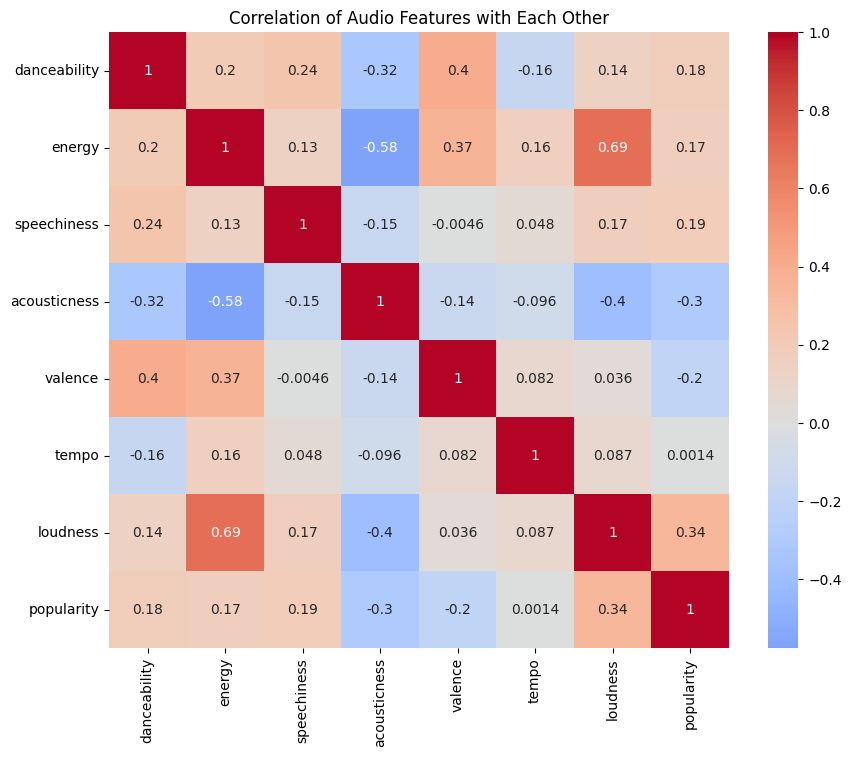

In [7]:
# Correlation matrix of audio features with popularity
audio_features = ['danceability','energy','speechiness','acousticness','valence','tempo','loudness']
corr = df[audio_features + ['popularity']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation of Audio Features with Each Other")
plt.show()

**Observation:** The correlation matrix reveals several interesting relationships among the audio features and their connection to popularity. Energy and loudness show a strong positive correlation (≈ 0.69), suggesting that louder songs tend to feel more energetic. Danceability also moderately correlates with valence (≈ 0.40) and energy (≈ 0.20), meaning upbeat and energetic tracks are often more danceable and perceived as happier. In contrast, acousticness is negatively correlated with both energy (–0.58) and loudness (–0.40), reflecting that quieter, acoustic songs tend to have lower energy levels. When looking at overall popularity, moderate positive relationships appear with danceability, energy, speechiness, and loudness (≈ 0.17–0.19), while acousticness shows a mild negative association (–0.30). These trends suggest that popular songs generally lean toward being louder, more energetic, and danceable, while softer, acoustic styles tend to chart lower.

It's important to note that this matrix is created using the entire dataset spanning roughly 50 years, meaning it captures multiple music eras and production trends. As a result, some correlations may be diluted or skewed by the evolution of genres, recording technologies, and listener preferences over time.

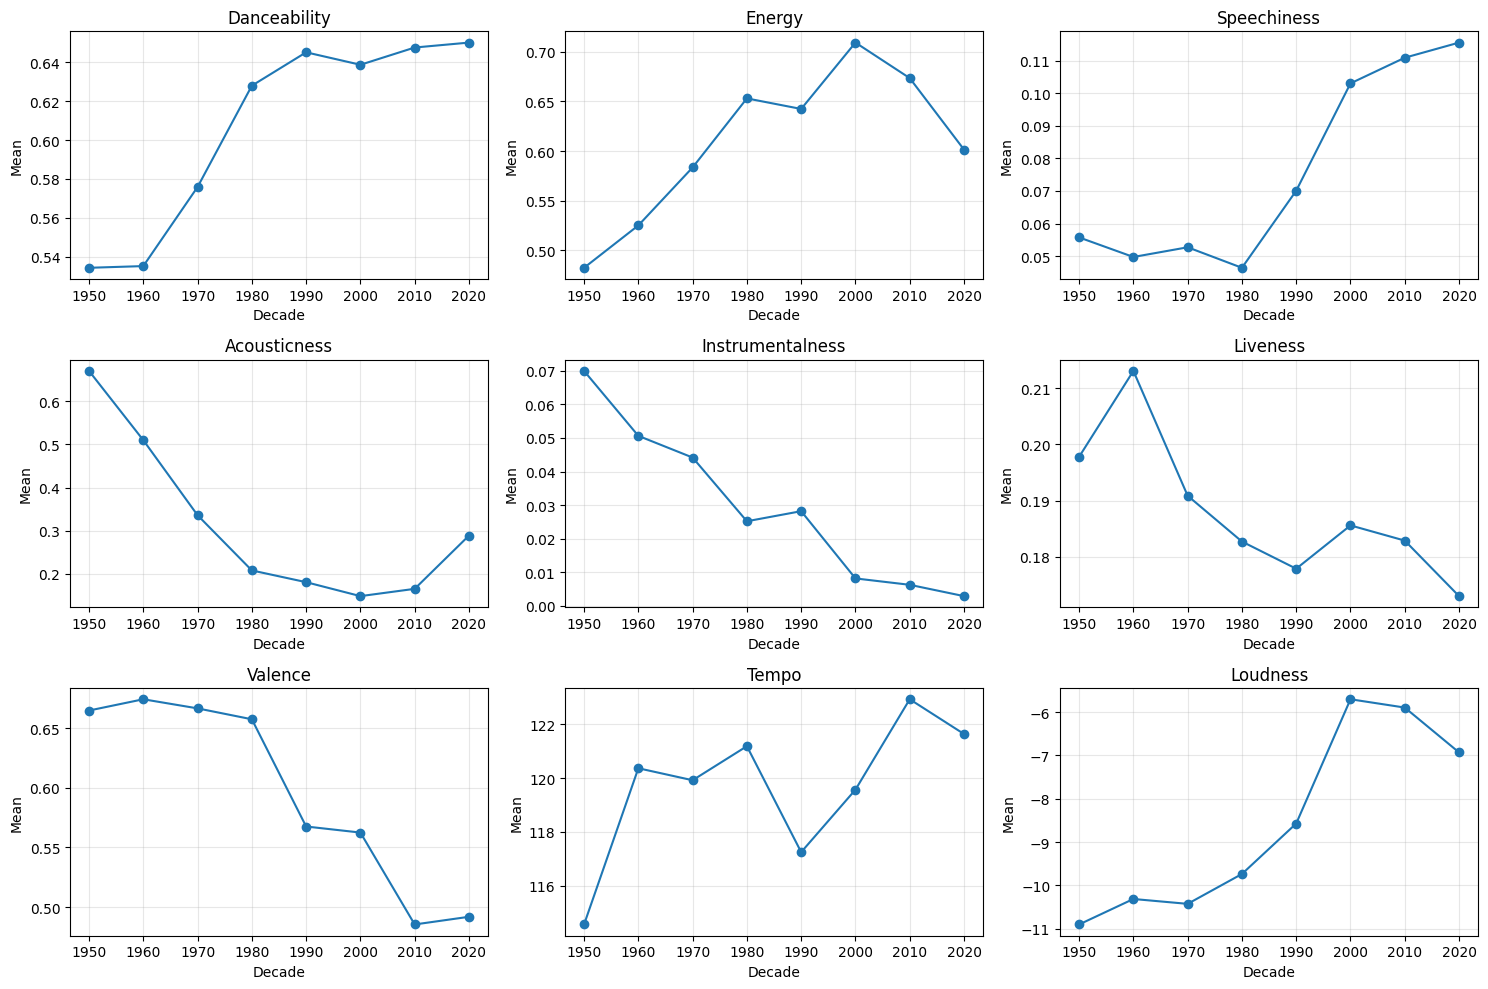

In [8]:
feature_cols = ['danceability','energy','speechiness','acousticness',
                'instrumentalness','liveness','valence','tempo','loudness']

decade_means = df.groupby('decade')[feature_cols].mean().reset_index()
decade_means


import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(feature_cols):
    axes[i].plot(decade_means['decade'], decade_means[feature], marker='o')
    axes[i].set_title(feature.capitalize())
    axes[i].set_xlabel('Decade')
    axes[i].set_ylabel('Mean')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Observation:** Danceability and energy both rise significantly from the 1970s onward, suggesting that modern hits have become increasingly upbeat and rhythm-driven. Loudness follows a similar trajectory, consistent with the “loudness wars” and the shift toward more compressed, high-volume production styles starting in the 1990s. Meanwhile, acousticness and instrumentalness decline steadily, highlighting a transition from organic, acoustic compositions to digitally produced and vocal-heavy tracks (thanks to technology). Speechiness climbs sharply in recent decades, reflecting the mainstream integration of rap and spoken-word elements. Valence (musical positivity) trends slightly downward since the 2000s, hinting that recent pop music may lean toward more emotionally complex or introspective tones. Tempo and liveness fluctuate across decades but remain relatively stable overall.


In [ ]:
sns.lineplot(data=df, x='decade', y='energy', hue='genre')